In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
nba_df = pd.read_csv("C:\\Users\\admin\\Training\\jupyternb\\Datasets\\nba.csv")

# Clean and preprocess
nba_df_clean = nba_df_clean.copy()
nba_df_clean["Height_in_inches"] = nba_df_clean["Height"].apply(convert_height)


# Convert height to inches
def convert_height(height_str):
    try:
        feet, inches = map(int, height_str.split('-'))
        return feet * 12 + inches
    except:
        return np.nan

nba_df_clean["Height_in_inches"] = nba_df_clean["Height"].apply(convert_height)

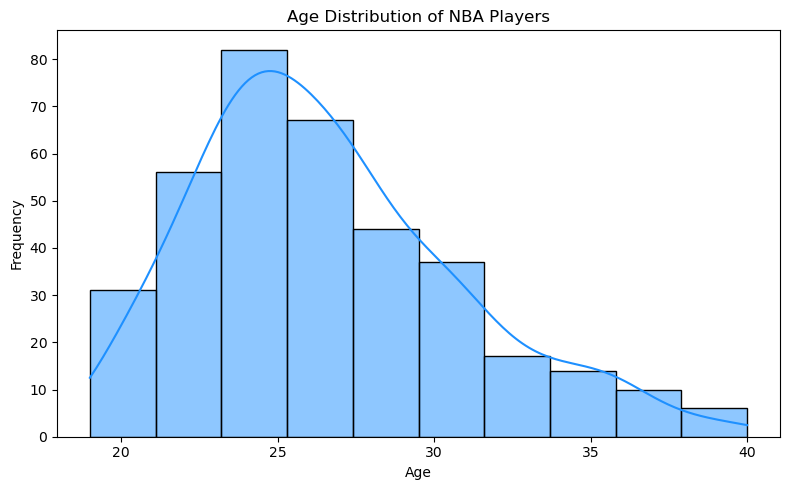

In [9]:
# 1) Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(nba_df_clean["Age"], bins=10, kde=True, color='dodgerblue')
plt.title("Age Distribution of NBA Players")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

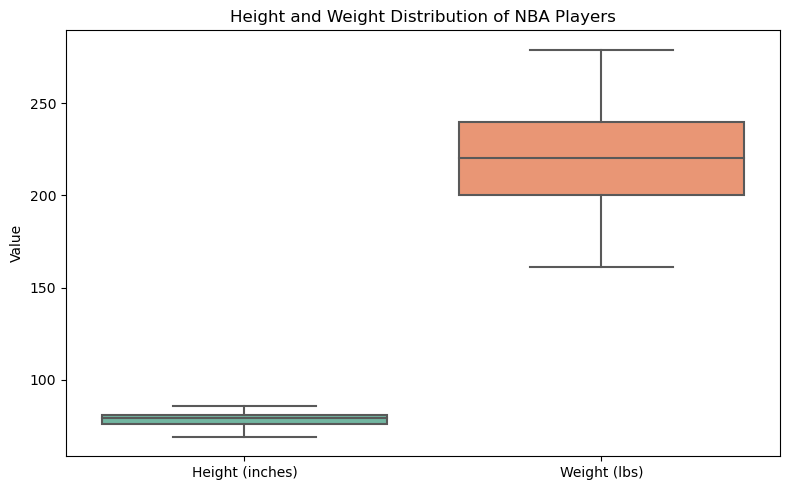

In [10]:
# 2) Height & Weight Distribution - Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=nba_df_clean[["Height_in_inches", "Weight"]], palette='Set2')
plt.title("Height and Weight Distribution of NBA Players")
plt.ylabel("Value")
plt.xticks([0, 1], ['Height (inches)', 'Weight (lbs)'])
plt.tight_layout()
plt.show()

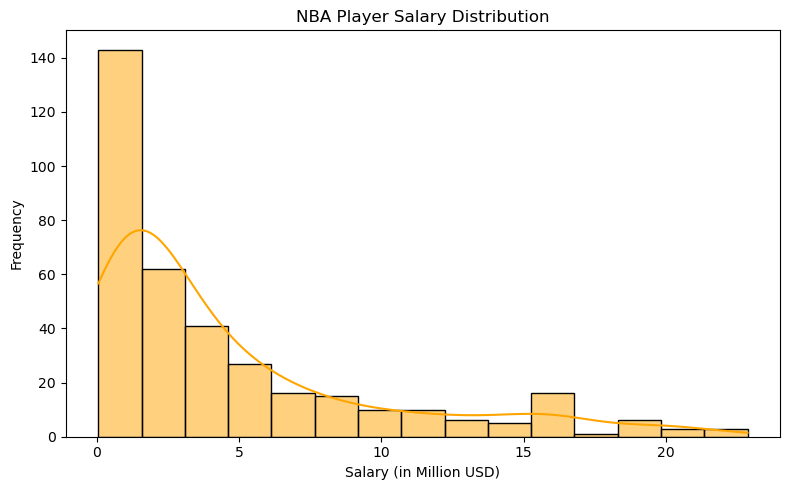

In [11]:
# 3) Salary Distribution
plt.figure(figsize=(8, 5))
sns.histplot(nba_df_clean["Salary"] / 1e6, bins=15, kde=True, color='orange')  # in millions
plt.title("NBA Player Salary Distribution")
plt.xlabel("Salary (in Million USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

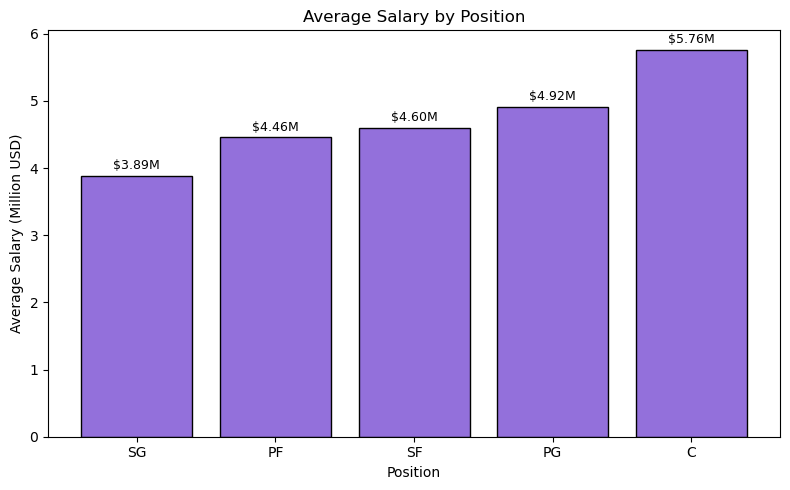

In [12]:
# 4) Position Salary Rank
position_salary = nba_df_clean.groupby("Position")["Salary"].mean().sort_values()

plt.figure(figsize=(8, 5))
bars = plt.bar(position_salary.index, position_salary.values / 1e6, color='mediumpurple', edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"${yval:.2f}M", ha='center', fontsize=9)

plt.title("Average Salary by Position")
plt.xlabel("Position")
plt.ylabel("Average Salary (Million USD)")
plt.tight_layout()
plt.show()

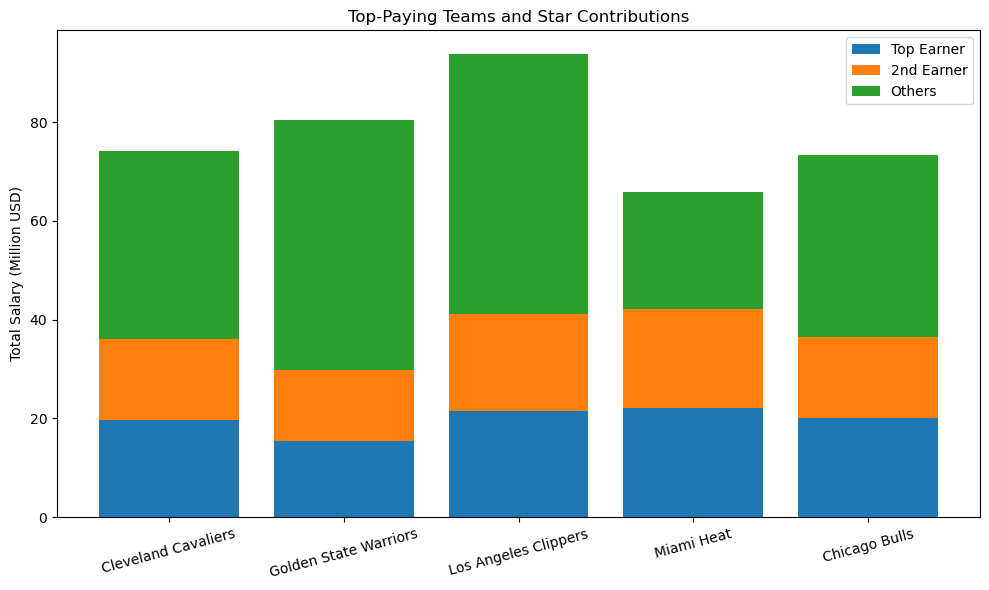

In [13]:
# 5) Top-Paying Teams with Multiple Stars
top_teams = nba_df_clean.groupby("Team")["Salary"].mean().sort_values(ascending=False).head(5).index
top_teams_data = nba_df_clean[nba_df_clean["Team"].isin(top_teams)]

stack_data = []
labels = []
for team in top_teams:
    team_df = top_teams_data[top_teams_data["Team"] == team].sort_values("Salary", ascending=False)
    top_two = team_df["Salary"].values[:2] / 1e6
    remainder = team_df["Salary"].sum()/1e6 - top_two.sum()
    stack_data.append([*top_two, remainder])
    labels.append(team)

stack_data = np.array(stack_data)
indices = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(indices, stack_data[:, 0], label='Top Earner')
plt.bar(indices, stack_data[:, 1], bottom=stack_data[:, 0], label='2nd Earner')
plt.bar(indices, stack_data[:, 2], bottom=stack_data[:, 0] + stack_data[:, 1], label='Others')

plt.xticks(indices, labels, rotation=15)
plt.title('Top-Paying Teams and Star Contributions')
plt.ylabel('Total Salary (Million USD)')
plt.legend()
plt.tight_layout()
plt.show()

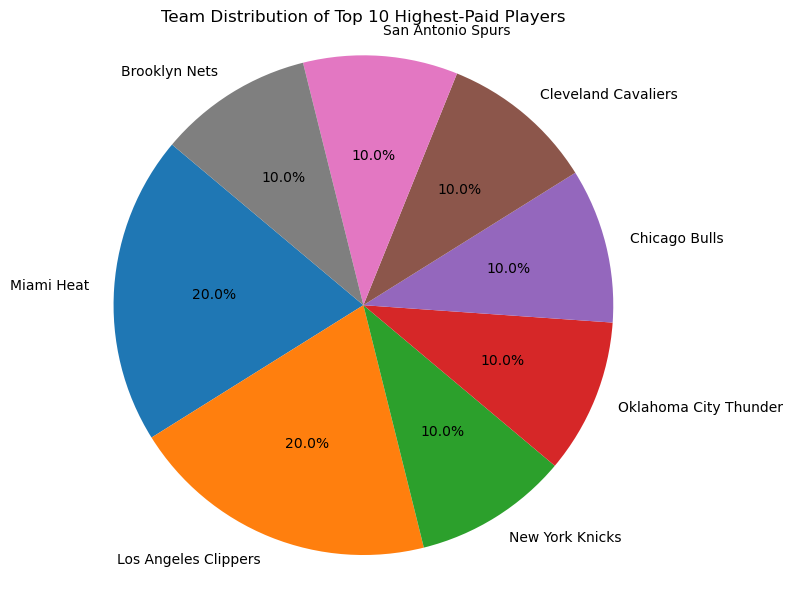

In [14]:
# 6) Team Distribution of Top 10 Earners
top10_players = nba_df_clean.sort_values("Salary", ascending=False).head(10)
top10_team_counts = top10_players["Team"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(top10_team_counts.values, labels=top10_team_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Team Distribution of Top 10 Highest-Paid Players')
plt.axis('equal')
plt.tight_layout()
plt.show()